A brief on implementing the backpropogation algorithm for a 2 layer Neural Network

#### Problem
Binary classification. We generate synthetic dataset using the sklearn library function

### Data 

We generate 100 data points, each having 2 features/dimensions belonging to two classes as shown in the visualization.

Task is to build a 2 layer NN to classify a given point as belonging to either of these classes.

In [1]:
import sklearn.datasets as toy_data 
import numpy as np
from sklearn.metrics import accuracy_score

x,y= toy_data.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2,random_state=191)

In [2]:
print("Classes/Labels in the data:",np.unique(y))

Classes/Labels in the data: [0 1]


### Visualize the data

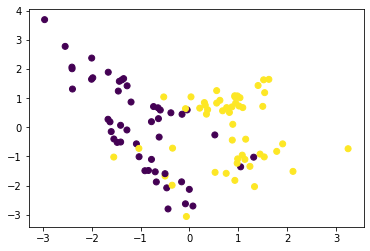

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x[:,0],x[:,1],c=y)

We shall build a 2 layer neural network having 4 neurons in the hidden layer and as this is a binary classification task a single neuron in the output layer will suffice. All neurons have sigmoid activation.

A 2 layer Network
    ![2layerNN](2_NN.png)


Fig 1.

We start with a random set of weights and biases with [Xavier initialization](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79). As the sigmoid gives a value between 0 and 1 we fix a threshold at 0.5 to classify the sample as belonging to class 1 if it's greater than 0.5 else class 0 . 

We experiment with cross-entropy loss and mean squared error as the cost function to optimize using vanilla <b>Gradient Descent </b> to update the weights and biases of the network.

### Forward pass

During the forward pass we construct intermediate gate 'Z' at the input of each neuron which will allow us to easily compute the local gradients and chain the errors from the output back to input layer.

A 2 layer Network with intermediate gates 'Z'
![2layerNN_intermediate gate](2l_nn_intermediate_gate.png)

Fig 2.

'b' is the bias associated with the neuron, every neuron has it's own bias, for representation purposes only 2 bias  and 3 weights are shown. We will arrive at the expression for gradients for one weight and bias and then genaralize them for the rest of the network. 

#### Weight matrix

For the network under consideration, each of the 4 neuron in the hidden layer has 2 edges connected to it, so there are 4x2 weights at the input layer and 1x4 weights in the output layer . 

At a layer, we arrange the weight matrix such that a row holds all the weights of the edges connected to a particular neuron. Thus, number of rows of the matrix is equal to the number of neurons in a layer.

#### Layer 1
Eg:The first row of the weight matrix for layer 1 will have weights w11 and w12 where wij indicates the weights going to neuron 'i' from 'j'.

$$
W_{l1} = 
\begin{bmatrix}
w11 & w12 \\
w21 & w22  \\
w31 & w32  \\
w41 & w42  \\
\end{bmatrix}
$$

There are 4 neurons in the hidden layer & we have 4 rows in the weight matrix. 

'Z' is the input gate to a neuron which is the weighted sum of inputs.

Eg: $ Z1 = w11*x1 + w12*x2 + b1 \cdots (A1) $

Writing it in a vector form, let $Z$ = [Z1 Z2  Z3  Z4] and $b$ =[b1 b2 b3 b4] be the vector of inputs and bias respectively to layer 1 so  
$Z$ = $W_{l1}x_i + b$ for each input sample $x_i$ 

$ sigma(Z1) $ is the output of the first activation '1' 

In vectorized form $ sigma(Z) $  is vector of activations applied to Z.

#### Layer 2
$$ 
W_{l2} =
\begin{bmatrix}
w1 \
w2 \
w3 \
w4
\end{bmatrix}
$$

###### Note: We are using the same convention as above, all weights connecting to a neuron form a row

Therefore
$ Z_f = w1*sigma(Z1)+w2*sigma(Z2)+w3*sigma(Z3)+w4*sigma(Z4) + b $ <b> ... (1)</b>

In matrix form,
$$ Z_f = W_{l2}sigma(Z) + b$$ 
Output of the network
$$ F = sigma(Z_f) $$

### Summary

Forward pass is about computing the matrix product of weights and input/neuron output and adding the bias untill we reach the final layer which is the output of the neural network.

An alternate way to see the matrix product of weights and neurons is as the sum of the product of each neuron and the weights going out from them to the next layer.

In layer 1 consider the sum of the product of input $x1$ , $x2$ and the corresponding the weights going out from them to layer2 + the bias for each neuron

$$
x1
\begin{bmatrix}
w11 \\
w21  \\
w31  \\
w41  \\
\end{bmatrix}
+
x2
\begin{bmatrix}
w12 \\
w22 \\
w32 \\
w42 \\
\end{bmatrix}
+
\begin{bmatrix}
b1 \\
b2 \\
b3 \\
b4 \\
\end{bmatrix}=
\begin{bmatrix}
w11 & w12 \\
w21 & w22  \\
w31 & w32  \\
w41 & w42  \\
\end{bmatrix} 
\begin{bmatrix}
x1\\
x2
\end{bmatrix} + b_{l1} = W_{l1}x_i + b_{l1}= Z
$$


$sigma(Z) = \begin{bmatrix} sigma(Z1) \\ sigma(Z2) \\ sigma(Z3) \\ sigma(Z4)\end{bmatrix} $ is the output of layer1 

Similary for layer2 consider the sum of the product of the output of the neurons in the layer1 and the corresponding weights + bias which is the same form as in $(1)$ above.

### Backward pass

In the backward pass we start from the last layer.

With the current set of weights and bias we find the ouput of the network for a given sample. Next, we need a metric to measure the performance of the network, how close/far we are from the desired response based on which we change the weights & bias. For this let's define a error/cost function which we wish to reduce by tuning the weights and bias.

Let's choose <b>squared error</b> as the cost function to optimize. As the network output $F$ gets closer to the known labels $y$ cost reduces and the cost increases if the predicted value diverges from the true labels.

Cost $C = \frac{(y-F)^2}{2} \cdots (2) $ 

If you expand $F$ we can see that the cost is a function of the weights and bias of the network. Label $y$ and the input are not variables.

<sub> Note: $\frac{1}{2}$ is used so that on differentiating 2's cancel out. </sub>

  <sub> Later we will see how to use the cross entropy loss </sub>

#### How do we change the weights and biases?

Our objective here is to reduce the cost/error function by changing the weights and bias. 

A slight digress to see two approaches to achieve our objective using a toy example of a parabola.

Consider a function $f = (x+1)^2 + 1 $, a parabola for which we want to know the value of $x$ at which it attains it's minimum value, similar to our objective of finding those weights & bias where the cost attains it's minimum value, only that our toy example has a single parameter $x$. 

To find the minimum of a function analytically we can find the slope of the function and check where it is zero which gives us the min/max points. For the $f$ defined above, setting the derivate -which gives us the slope at a point- to zero $\frac{df}{dx} = 2(x+1)$  gives us $x=-1$ . Based on the second derivate test we can conclude that this is a minimum point.  In our problem too we need to find a set of weights & bias for which our cost function attains it's minimum value, but our network has 17 parameters & we can see that the above procedure is cumbersome to find the minimum analytically. For this we have to explictly write out the equation interms all 17 parameters and take the partial derivatives etc.. 

Instead, we use gradient descent where we start at a random point as determined by the initial weights and bias. We find the Gradient-partial derivative w.r.t each direction- of the cost function i.e w.r.t each weight and bias(we shall see how to do that in the next section) and move a small distance in the direction opposite to the one indicated by the Gradient by changing the weights and bias. Then, using this new set of weights & bias we find the network output and repeat the above process. 

After computing the gradient w.r.t each weight and the bias we update them as follows
<h5>
w  = w - learning_rate*gradient_Cost_weight

b = b - learning_rate*gradient_Cost_bias
</h5>

In practice, updates are not normally done after we run through each sample but in batches, where we accumulate the gradient over the samples in the batch and update the weights and bias once at the end of the batch.


Eg: Consider the above function $f=(x+1)^2 + 1$. Suppose we wish to find the minimum using the gradient descent approach.


In [4]:
start_point = 12.237 # Some random point
gradient=lambda x:2*(x+1) # this is the slope df/dx

def gd(max_steps=30,learning_rate=0.1,x=start_point,threshold=1e-4):
    
    diff_grad = 1 # difference between gradient values in the successive iterations
    prev_grad = 1 
    steps=1
    
    # We stop iterating when either the difference between successive gradient values 
    # is less than a threshold or max_iteration steps is reached
    
    # As we get close to the min/max points where the gradient is zero, diff in the 
    # successive values of the gradient computed will be very small
    
    while ((diff_grad>threshold) and (steps<max_steps)): 
        
        # Calculate the gradient at each step
        grad = gradient(x)
        # Move in the direction opposite to the gradient by a small distance as 
        # determined by the learning rate
        
        x = x - learning_rate * grad
        
        diff_grad = abs(prev_grad - grad)
        prev_grad = grad
        steps+=1
        
    return x,steps

val,step = gd(50,0.3)
print("Value %.5f Iteration %d"%(val,step))

Value -0.99999 Iteration 17


Earlier, analytically we found out that the minimum val of $x$ is -1. We can experiment with different learning rates and thresholds.


#### Why does taking the gradient work ?

Gradient gives us the direction of the steepest ascent, i.e direction in which the function increases the most if we change the parameters accordingly. But we want to reduce the cost so we go in the opposite direction of the Gradient. 

If a function $f(x,y,z)$ has 3 parameters, the gradient is given by $ \nabla(f) = [\frac{\partial f}{\partial x} \frac{\partial f}{\partial y} \frac{\partial f}{\partial z}] $

<sub> Note: It can be mathematically proven that the direction given by the gradient is the one in which function increases the most. </sub>

In 1-D we know that the slope of the function at a point is given by the derivative of the function evaluated at that point.<blockquote>"The gradient is a generalization of slope for functions that don’t take a single number but a vector of numbers"</blockquote> By evaluating the gradient we are calculating the slope of the function in each dimension and we move in the direction opposite to the one indicated by the gradient for the reasons state above by a small distance as determined by the learning rate.

<blockquote>"The derivative on each variable tells you the sensitivity of the whole expression on its value"</blockquote> Eg: If the slope of the function at a point is 'l' and we perturb the point by a infinitesimally small value h then the overall effect on network is to change the ouput by approximately 'lh' . 

Let's take $y=x^2$ , slope at any point is $2x$ . At $x=5$ , $y=25$ and slope is 10.
Suppose we change x by h=0.001(Why should 'h' be small, derivate is defined only in an infinitesimally small region about a point, it is in the limit as $h->0$ so we consider only small changes) 
If we change x by h, change in the ouput is given by approx 10h = 0.01.

Verify: (5.001)**2 = 25.010001... so the change is 0.01 . 



Coming back to the network...


### Layer 2 weights and bias 

Let's find the gradient of the cost w.r.t weight in layer2 $W1$ as shown in the figure 2 above which is given by 

$$ \begin{equation}
  \frac{\partial C}{\partial W_1} \cdots (A) 
  \end{equation}$$

In computing this gradients we will make use of the intermediate gates, $Z$ . 
For the network under consideration we can calculate the gradient using chain rule as follows

$$ \begin{equation}
   \frac{\partial C}{\partial W_1} = \frac{\partial C}{\partial Z_f} \frac{\partial Z_f}{\partial W_1} \end{equation}$$ 
   Where $Z_f$ is a function of $W_1$ and $C$ is a function of $Z_f$.
   
   From the equation (2) above 
   $C = \frac{(y-F)^2}{2} $
   
   Where $F = sigma(Z_f)$
   
   Hence, 
      
   
   $$ \begin{equation}
      \frac{\partial C}{\partial Z_f} = \frac{\partial C}{\partial F} \frac{\partial F}{\partial Z_f} \end{equation} $$  
      
   $$ \begin{equation}
      \frac{\partial C}{\partial F} = (F-y) \cdots (L)
      \\
      \frac{\partial F}{\partial Z_f} = sigma(Z_f)(1-sigma(Z_f)) = sigma^\prime(Z_f)
      \end{equation}     
   $$
   
   Thus,  $$ \begin{equation}
      \frac{\partial C}{\partial Z_f} = (F-y) sigma^\prime(Z_f) \end{equation}  $$       
   
   
   We'll use this value later to find the gradients of the cost w.r.t weights in layer 1, let's call this delta
   
   $$ \textbf{delta} = \frac{\partial C}{\partial Z_f} = (F-y) sigma^\prime(Z_f) \cdots (3) $$
   
From equation (1) above
$$ 
    \frac{\partial Z_f}{\partial W_1} = sigma(Z_1) 
    \cdots (4) $$  
    
      
  Using (3) & (4) above we get $$ \frac{\partial C}{\partial W_1} =  \frac{\partial C}{\partial Z_f}sigma(Z_1) = \textbf{delta} \cdot sigma(Z_1) \cdots (W_{l2}) $$ as we desired to find out in $(A)$ 
  Same steps can be used to find the gradient w.r.t other weights in the second layer.
  
  
  General expression for the gradient of weights in layer2 is $$ \frac{\partial C}{\partial W_i} = \textbf{delta} \cdot sigma(Z_i) ; i:1->4 $$
  
  Similarly, gradient w.r.t bias 'b' is given by
  
  $$ \frac{\partial C}{\partial b} = \frac{\partial C}{\partial Z_f} \frac{\partial Z_f}{\partial b} $$ 
   Using (1) and (3)
   $$ \frac{\partial C}{\partial b} = \frac{\partial C}{\partial Z_f} $$
   
   
### Layer 1 weights and bias 

   Let's find the gradient of the cost w.r.t weights in the layer 1. 
   Consider the weight $w11$.
   
   Gradient of the cost w.r.t weight $w11$ is given by 
   $\frac{\partial C}{\partial w11}$
   
   In order to compute this we shall once again make use of the chain rule. We'll chain the gradients computed in layer2 with the local gradients in the layer1 .
   
   #### Rule
   Find the intermediate gate -in this case Z1- derive the local gradient of the intermediate gate w.r.t the weight under consideration, find the gradient of the cost w.r.t the local gate by chaining with the gradients of the layer ahead the current one, in this case layer 2.
   
   We can compute    $$\frac{\partial C}{\partial w11} = \frac{\partial C}{\partial Z1}\frac{\partial Z1}{\partial w11} \cdots (5) $$
    local gradient $$ \frac{\partial Z1}{\partial w11} = x1 \cdots (6) $$ is easy to compute using  $ Z1 = w11*x1 + w12*x2 + b1 \cdots  $ as defined in (A1) in the forward pass section . 
    
Now, by chain rule once again $$\frac{\partial C}{\partial Z1} = \frac{\partial C}{\partial Z_f}\frac{\partial Z_f}{\partial Z1}$$ 

   Where  $Z_f$ and $Z1$ are one of the parameters of the function of $C$ and $Z_f$ respectively from (1) .

Let's call $\frac{\partial C}{\partial Z1}$ as $\textbf{delta_z1}$ just as we did earlier.


By (3) above we know $ \frac{\partial C}{\partial Z_f}  $ which is $\textbf{delta}$, Now all that's left is to compute is $ \frac{\partial Z_f}{\partial Z1}$

This is also easily computed from (1) above 

$$ \frac{\partial Z_f}{\partial Z1} = w1sigma^\prime(Z1) \cdots (7) $$
Thus, $$ \textbf{delta_z1} = \textbf{delta} \cdot w1sigma^\prime(Z1) \cdots (8)$$

Thus, from (6) (7) and (8) we get$$\frac{\partial C}{\partial w11} = \textbf{delta_z1} \cdot x1 \cdots (w_{l1})$$ 

Here, in layer 1 gradient of the weight is the product of local delta in layer 1 and the input data sample. 

For layer 2, gradient of the weight is the product of the local delta in layer 2 and the output of the activation of layer1 as seen in (4) above.

Note how $\textbf{delta}$ terms were constructed and chained with the earlier computed values as seen in (8)

Gradient w.r.t bias is simple, as we did earlier, compute the local gradient and chain it with gradients flowing from the layer ahead of the current one.

$$ \frac{\partial C}{\partial b1} = \textbf{delta_z1}\frac{\partial Z1}{\partial b1}
\\
                                  = \textbf{delta_z1}$$



### Summary 

In the backward pass starting from the last layer compute the gradient of the cost function w.r.t the intermediate gate $Z_f as \frac{\partial C}{\partial Z_f}$ and the local gradient $\frac{\partial Z_f}{\partial W_i}$ . Product of (3) and (4) gives the gradient of the cost w.r.t  weight in layer 2 , similarly for bias.

For weights in layer 1, we follow a similar procedure where compute the gradient of the cost w.r.t intermediate gate $ \frac{\partial C}{\partial Z_i}$ and the local gradient $\frac{\partial Z_i}{\partial W_{ij}}$ using (6) and (8) whose general expression is as follows
   
   * cost gradient w.r.t intermediate gate: $ \textbf{delta_zi} = \frac{\partial C}{\partial Z_i} = \textbf{delta} * W_i * sigma^\prime(Z_i) $
   
   * local gradient : $ \frac{\partial Zi}{\partial w_{ij}} = x_j  $

##### Expressing the operations in matrix form

Layer 2/Output layer  weights

Weight gradient : Product of $\textbf{delta}$ and the vector output of layer 1 = 
                  $\textbf{delta} \cdot sigma(Z_{l1}) $

For other layers 

1. Find the $\textbf{delta's}$ associated with current layer using the sum of the product of $\textbf{delta}$ of the layer ahead of the current one and the weights feeding into those corresponding intermediate gate.

Layer 1 weights

$\textbf{delta_l1}  = \textbf{delta} \begin{bmatrix} W1 & W2 & W3 & W4 \end{bmatrix} = \textbf{delta} (\cdot) W_{Transpose} $ as $W$ is a column vector , now $\textbf{delta_l1}$ is a row vector.

2. To find the gradients, take a matrix product of the $\textbf{delta}$ computed in the step 1 with the inputs of the layer 1

 grad = $\textbf{delta_l1}_{Transpose}  \begin{bmatrix} x1 & x2 \end{bmatrix} $ 
 
 When we constructed the weight matrix earlier each row contained the weights connected to the neuron in layer ahead of the current one. Now, in step2 if we try to the match the weights with the edge connecting the input with neuron in layer 1 we see that the order of the gradients for the corresponding weights is maintained. 

For bias update we saw that we only need the $\textbf{delta}$ associated with the intermediate gate.


### Note:
After computing the loss for each sample, we accumulate the gradient and do a weight update at the end of the epoch ( As the data set is small we shall use the full data to define the batch ) 

Without this approach of constructing intermediate gates and chaining the errors from the previous layers it becomes a humongous task to derive the gradients of the cost w.r.t each weight and bias 

Eg: Let's write the cost by seeing where weight $w11$ fits in using (1) and (A1) above ,
    $$ C = (y - sigma(Z_f)) = (y-sigma( w1*sigma(Z1)+w2*sigma(Z2)+w3*sigma(Z3)+w4*sigma(Z4) + b)) =  (y-sigma( w1*sigma(w11*x1 + w12*x2 + b1)+w2*sigma(Z2)+w3*sigma(Z3)+w4*sigma(Z4) + b))$$ 
    
We are dealing with a simple 2 layer network and the expression seems overwhelming to derive the gradient w.r.t w11 and for all the other weights and bias. Instead, in the backpropgation algorithm  we define intermediate gates, find the local gradients and chain them to get the requried result.

We used mean squared error earlier, by the changing the loss function to cross entropy we only have to modify the loss in the final layer

### Binary cross entropy loss 

Cross entropy loss is defined by 
$ C = -(ylog(F) + (1-y)log(1-F)) $ where $F = sigmoid(Z_f)$ It is easy to verify that if the prediction $F$ closely agrees with the actual label y(which is either 0 or 1) penalty is low else it is higher. 
Eg: If we expected label to be 1 but we got 0 penalty is high from $ylog(F)$ term

From the above discussion we only have to calcuate the new value for delta at the layer 2 which is $\frac {\partial C}{\partial Z_f} $ to see the performance of the network using the cross entropy loss function 
$$\frac {\partial C}{\partial Z_f} = \frac{\partial C}{\partial F} \frac{\partial F}{\partial Z_f}$$ 

From the loss function defined above it can be verified that ,
$$ \frac {\partial C}{\partial F} = -\frac{(F-y)}{(F)(1-F)}$$ and $$ \frac{\partial F}{\partial Z_f}= F(1-F) $$ 
Thus, $$ \frac {\partial C}{\partial Z_f} = (F-y) $$

We only need to replace the $\textbf{delta}$ arrived at in (3) which is $ (F-y) sigma^\prime(Z_f)$ for mean squared error loss  with $(F-y)$  for cross entropy loss and the network is all set to go!

Let's code it up.


### References : [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html),  [CS231n](https://cs231n.github.io/)

#### Define the activation and it's derivate

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def dsigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

#### Non-vectorized implementation

Loss function : Squared error 

In [6]:
def pred(x):
    z = np.matmul(w1,x.T)+b1.reshape(-1,1)
    l1_activation = sigmoid(z)
    f = np.matmul(w2,l1_activation)
    l2_activation = sigmoid(f)
    return l2_activation

In [7]:
layer=[2,4,1]


#Xavier initialization

#Layer 1 weights and bias
w1=np.random.uniform(-1,1,size=(layer[1],layer[0]))*np.sqrt(6/(layer[0]+layer[1]))
b1=np.zeros(shape=(layer[1]))

#Layer 2 weights and bias
w2=np.random.uniform(-1,1,size=(layer[2],layer[1]))*np.sqrt(6/(layer[1]+layer[2]))
b2=np.zeros(shape=(layer[2]))

lr = 1 # learning rate

# to reserve some samples for testing
train_idx = -1

N = len(x[:train_idx])

for epochs in range(301):
     
    # Accumulate the gradients for weights and bias after computing the loss for each sample
    # and then update the weights & biases at the end
    
    w1_grad=np.zeros_like(w1)
    w2_grad=np.zeros_like(w2)
    b1_grad=np.zeros_like(b1)
    b2_grad=np.zeros_like(b2)
    
    for idx in range(len(x[:train_idx])):
        
    ## Forward pass

        # Iterate through each sample
        # layer1
        
        # As defined above in the forward pass section, vector of input z is the matrix multiplication
        # of weights and input, then we add a bias
        
        z = np.matmul(w1,x[idx])+b1
        l1_activation = sigmoid(z)
        l1_activation_gradient = dsigmoid(z)
        
        #layer2
        f = np.matmul(w2,l1_activation)+b2
        l2_activation = sigmoid(f)
        l2_activation_gradient = dsigmoid(f)

        # l2_activation is the output of the network
        # In backward pass we first compute the loss/cost function and then derive the 
        # gradients w.r.t weights and biases
    
    ## Backward pass
  
        loss = (l2_activation - y[idx]) # As defined in (L) above in the backward pass section
        
        #layer2
        delta = loss*l2_activation_gradient # As defined in (3) above in the backward pass section
        w2_grad+=l1_activation*delta # As defined in (Wl2) above in the backward pass section
        b2_grad+=delta
        #layer1
        
        # As defined in (8) above in the backward pass section
        loss = np.matmul(w2.T,delta)
        delta = (loss*l1_activation_gradient) 
        
        # As defined in (wl1) above in the backward pass section
        w1_grad+= np.matmul(delta.reshape(-1,1),x[idx].reshape(1,-1))
        b1_grad+= delta
        
    if(epochs%100==0):        
        ypred_train = pred(x[:train_idx])
        ypred_train = np.where(ypred_train>0.5,1.0,0).flatten()
        print("epoch:",epochs,
              "train_acc:",np.round(accuracy_score(ypred_train,y[:train_idx])*100,2))      
    
    #update weights
    w1 -= lr*w1_grad/N
    w2 -= lr*w2_grad/N
    b1 -= lr*b1_grad/N
    b2 -= lr*b2_grad/N

epoch: 0 train_acc: 48.48
epoch: 100 train_acc: 86.87
epoch: 200 train_acc: 88.89
epoch: 300 train_acc: 88.89


Now, let us vectorize the operation where we compute the gradients all at once for each sample and the update the weights and biases. We used two loops earlier, one for epochs and another to loop over the training sample. In vectorized implementation as our batch size is the same as the dataset we use only one loop for epochs

In the vectorized implementation we arrange data such that each column in the input data matrix represents sample 

$$ data = \begin{bmatrix}
          | &  | \cdots |\\
          x1 & x2 \cdots xn\\
          | & | \cdots |
          \end{bmatrix}$$
          
Our weight matrix structure remains the same

Accumulation of the gradients to update the weights automatically happens by the virtue of matrix multiplication of the delta's and activation/input depending of the layer, in the non-vectorized implementation we manually added gradients after computing the loss for each sample. We only have sum the gradients 

### (ii) Vectorized implementation

In [8]:
layer=[2,4,1]

#Xavier initialization
w1=np.random.uniform(-1,1,size=(layer[1],layer[0]))*np.sqrt(6/(layer[0]+layer[1]))
b1=np.zeros(shape=(layer[1],1))
w2=np.random.uniform(-1,1,size=(layer[2],layer[1]))*np.sqrt(6/(layer[1]+layer[2]))
b2=np.zeros(shape=(layer[2],1))

lr = 1
train_idx = -1
N = len(x)

for epochs in range(101):

    #forward pass
    #layer1
    z = np.matmul(w1,x.T)+b1
    l1_activation = sigmoid(z)
    l1_activation_gradient = dsigmoid(z)
    
    #layer2
    f = np.matmul(w2,l1_activation)+b2
    l2_activation = sigmoid(f)
    l2_activation_gradient = dsigmoid(f)

    #backward pass    
    #layer2
    l2_delta = (l2_activation - y)*l2_activation_gradient
    
    #layer1
    l1_delta = np.matmul(w2.T,l2_delta)*l1_activation_gradient
#     l1_delta = w2.T*l2_delta*l1_activation_gradient
     
    #update weights & biases
    
    w1 -= lr*np.matmul(l1_delta,x)/N
    w2 -= lr*np.matmul(l2_delta,l1_activation.T)/N

    b1 -= lr*l1_delta.sum(axis=1).reshape(-1,1)/N
    b2 -= lr*l2_delta.sum(axis=1)/N
    ypred_train = np.where(l2_activation>0.5,1.0,0).flatten()
    
    if(epochs%10==0):  
        # convert to classes
        ypred_train = np.where(l2_activation>0.5,1.0,0).flatten()
        print("epoch:",epochs,
              " train_acc:",np.round(accuracy_score(ypred_train,y)*100,2))

epoch: 0  train_acc: 51.0
epoch: 10  train_acc: 67.0
epoch: 20  train_acc: 81.0
epoch: 30  train_acc: 84.0
epoch: 40  train_acc: 85.0
epoch: 50  train_acc: 86.0
epoch: 60  train_acc: 86.0
epoch: 70  train_acc: 87.0
epoch: 80  train_acc: 89.0
epoch: 90  train_acc: 89.0
epoch: 100  train_acc: 89.0


#### How well does our network implementation fair against implementing it using tensorflow.

In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4,input_shape=(2,),activation='sigmoid'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='mean_squared_error',metrics=['accuracy'])
model.fit(x,y,epochs=100,verbose=1)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 5ms/sample - loss: 0.2986 - accuracy: 0.5100
Epoch 2/100
100/100 [==============================] - 0s 322us/sample - loss: 0.2953 - accuracy: 0.5100
Epoch 3/100
100/100 [==============================] - 0s 175us/sample - loss: 0.2906 - accuracy: 0.5100
Epoch 4/100
100/100 [==============================] - 0s 231us/sample - loss: 0.2887 - accuracy: 0.5100
Epoch 5/100
100/100 [==============================] - 0s 240us/sample - loss: 0.2859 - accuracy: 0.5100
Epoch 6/100
100/100 [==============================] - 0s 115us/sample - loss: 0.2824 - accuracy: 0.5100
Epoch 7/100
100/100 [==============================] - 0s 189us/sample - loss: 0.2803 - accuracy: 0.5100
Epoch 8/100
100/100 [==============================] - 0s 157us/sample - loss: 0.2785 - accuracy: 0.5100
Epoch 9/100
100/100 [==============================] - 0s 213us/sample - loss: 0.2768 - accuracy: 0.5100
Epoch 10/100
100/100 [==============

100/100 [==============================] - 0s 109us/sample - loss: 0.1848 - accuracy: 0.8400
Epoch 79/100
100/100 [==============================] - 0s 99us/sample - loss: 0.1837 - accuracy: 0.8500
Epoch 80/100
100/100 [==============================] - 0s 121us/sample - loss: 0.1823 - accuracy: 0.8500
Epoch 81/100
100/100 [==============================] - 0s 151us/sample - loss: 0.1812 - accuracy: 0.8500
Epoch 82/100
100/100 [==============================] - 0s 119us/sample - loss: 0.1801 - accuracy: 0.8600
Epoch 83/100
100/100 [==============================] - 0s 185us/sample - loss: 0.1788 - accuracy: 0.8600
Epoch 84/100
100/100 [==============================] - 0s 122us/sample - loss: 0.1775 - accuracy: 0.8500
Epoch 85/100
100/100 [==============================] - 0s 119us/sample - loss: 0.1766 - accuracy: 0.8500
Epoch 86/100
100/100 [==============================] - 0s 119us/sample - loss: 0.1756 - accuracy: 0.8500
Epoch 87/100
100/100 [==============================] - 0s 1

#### Accuracy scores are close in both the implementations, seems like we've done a good job !

In the next tutorial we will see how easy it is to generalize this approach to implement any n-layer neural network considering multiple neurons in the output layer.